In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.ticker as ticker

In [2]:
#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_mpi+openmp_lumped_17810_p1"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



df = pd.read_csv('./data/crankshaft_17810_lumped_P1-P2-P4_hybrid.csv', sep=";")
df

Number_Ranks  Number_Threads  Nodes_X_Threads MPI+OpenMP  P1_ElapsedTime  \
0              1               1                1        1+1          9.7037   
1              1               2                2        1+2          6.2022   
2              1               4                4        1+4          3.3850   
3              1               8                8        1+8          1.9739   
4              1              16               16       1+16          1.5343   
5              1              20               20       1+20          1.7720   
6              1              40               40       1+40          1.2140   
7              2               1                2        2+1          5.1718   
8              2               2                4        2+2          3.5376   
9              2               4                8        2+4          2.1354   
10             2               8               16        2+8          1.4901   
11             2              16               32       2+16          1.0779   
12             2              20               40       2+20          1.1687   
13             2              40               80       2+40          0.8866   
14             4               1                4        4+1          2.4820   
15             4               2                8        4+2          1.8648   
16             4               4               16        4+4          1.1233   
17             4               8               32        4+8          0.7691   
18             4              16               64       4+16          0.6059   
19             4              20               80       4+20          0.6476   
20             4              40              160       4+40          0.4960   
21             8               1                8        8+1          1.2959   
22             8               2               16        8+2          0.9832   
23             8               4               32        8+4          0.6253   
24             8               8               64        8+8          0.4413   
25             8              16              128       8+16          0.3753   
26             8              20              160       8+20          0.3995   
27             8              40              320       8+40          0.3735   
28            16               1               16       16+1          0.6368   
29            16               2               32       16+2          0.5246   
30            16               4               64       16+4          0.3364   
31            16               8              128       16+8          0.2504   
32            16              16              256      16+16          0.2226   
33            16              20              320      16+20          0.2227   
34            16              40              640      16+40          0.2812   
35            20               1               20       20+1          0.5157   
36            20               2               40       20+2          0.4168   
37            20               4               80       20+4          0.2728   
38            20               8              160       20+8          0.2063   
39            20              16              320      20+16          0.1875   
40            20              20              400      20+20          0.1906   
41            20              40              800      20+40          0.2359   
42            25               1               25       25+1          0.4151   
43            25               2               50       25+2          0.3559   
44            25               4              100       25+4          0.2367   
45            25               8              200       25+8          0.1784   
46            25              16              400      25+16          0.1621   
47            25              20              500      25+20          0.1682   
48            25              40             1000      25+40          0.2454   
49  

In [3]:
df.columns

Index(['Number_Ranks', 'Number_Threads', 'Nodes_X_Threads', 'MPI+OpenMP',
       'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime', 'P1_SpeedUp',
       'P2_SpeedUp', 'P4_SpeedUp', 'P1_Efficiency', 'P2_Efficiency',
       'P4_Efficiency', 'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)',
       'P4_L2-Cache-Miss(%)', 'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)',
       'P4_ParallelRegion(%)'],
      dtype='object')

In [4]:
num_ranks = df['Number_Ranks'].unique()
num_threads = df['Number_Threads'].unique()

print(f'num_ranks: {num_ranks}, shape: {num_ranks.shape}')
print(f'num_threads: {num_threads}, shape: {num_threads.shape}')

num_ranks: [ 1  2  4  8 16 20 25 30], shape: (8,)
num_threads: [ 1  2  4  8 16 20 40], shape: (7,)


In [5]:
xx, yy = np.meshgrid(num_ranks, num_threads)
x, y = xx.ravel(), yy.ravel()

ranks, threads, speed_up = [], [], []

for i, j in zip(x, y):
    z = df[(df['Number_Ranks'] == i) & (df['Number_Threads'] == j)]['P1_SpeedUp'].values
    if z:
        speed_up.append(z[0])
        ranks.append(i)
        threads.append(j)

In [6]:
threads_mod = threads.copy()
for i in range(len(threads)):
    if threads_mod[i] == 20:
        threads_mod[i] = 32
    if threads_mod[i] == 40:
        threads_mod[i] = 64
        
ranks_mod = ranks.copy()
for i in range(len(ranks)):
    if ranks_mod[i] == 20:
        ranks_mod[i] = 32
    if ranks_mod[i] == 25:
        ranks_mod[i] = 64
    if ranks_mod[i] == 30:
        ranks_mod[i] = 128
        
num_threads_mod = num_threads.copy()
num_threads_mod[5] = 32
num_threads_mod[6] = 64

num_ranks_mod = num_ranks.copy()
num_ranks_mod[5] = 32
num_ranks_mod[6] = 64
num_ranks_mod[7] = 128

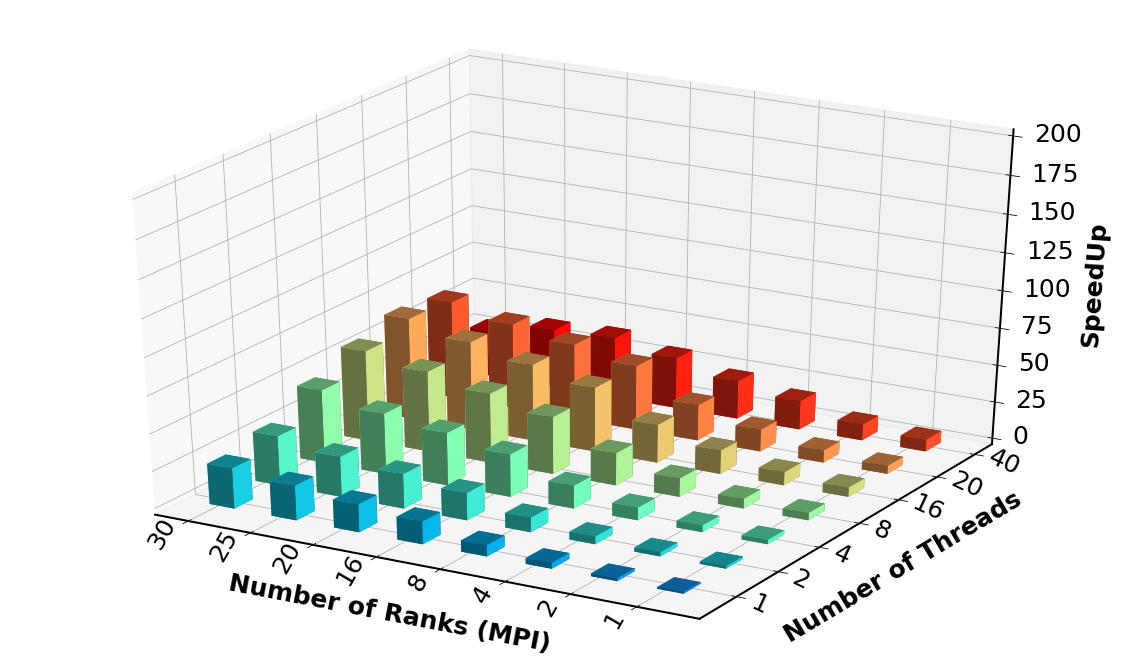

In [7]:
# log scale
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')
colors = cm.rainbow([0.2 + (1-0.2)/(len(ranks)-1)*i for i in range(len(ranks))])

width=1/2.5
ax.bar3d(np.log2(ranks_mod) - width,
         np.log2(threads_mod) - width,
         [0] * len(speed_up),
         width, width, speed_up, colors)

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set_xticks(np.log2(num_ranks_mod))
ax.set_xticklabels(num_ranks, rotation = (60), fontsize = 25, va='center', ha='right')
ax.set_xlabel('Number of Ranks (MPI)', fontsize=25, weight='bold', labelpad=24)
ax.set_xbound()

ax.set_yticks(np.log2(num_threads_mod))
ax.set_yticklabels(num_threads, rotation = (335), fontsize = 25, verticalalignment='center', 
                   horizontalalignment='left')
ax.set_ylabel('Number of Threads', fontsize=25, weight='bold', labelpad=18)
ax.tick_params(axis='y', pad=0.4)
ax.yaxis.labelpad=23

speedup=[0, 25, 50, 75, 100, 125, 150, 175, 200]
ax.set_zticklabels(speedup,  fontsize = 25, verticalalignment='center', 
                   horizontalalignment='left')
ax.set_zlabel('SpeedUp', fontsize=25, weight='bold', labelpad=18)
ax.set_zlim(0, 200)
ax.zaxis.labelpad=30

plt.show()

In [8]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [9]:
xx, yy = np.meshgrid(num_ranks, num_threads)
x, y = xx.ravel(), yy.ravel()

ranks, threads, speed_up = [], [], []

for i, j in zip(x, y):
    z = df[(df['Number_Ranks'] == i) & (df['Number_Threads'] == j)]['P2_SpeedUp'].values
    if z:
        speed_up.append(z[0])
        ranks.append(i)
        threads.append(j)

In [10]:
threads_mod = threads.copy()
for i in range(len(threads)):
    if threads_mod[i] == 20:
        threads_mod[i] = 32
    if threads_mod[i] == 40:
        threads_mod[i] = 64
        
ranks_mod = ranks.copy()
for i in range(len(ranks)):
    if ranks_mod[i] == 20:
        ranks_mod[i] = 32
    if ranks_mod[i] == 25:
        ranks_mod[i] = 64
    if ranks_mod[i] == 30:
        ranks_mod[i] = 128
        
num_threads_mod = num_threads.copy()
num_threads_mod[5] = 32
num_threads_mod[6] = 64

num_ranks_mod = num_ranks.copy()
num_ranks_mod[5] = 32
num_ranks_mod[6] = 64
num_ranks_mod[7] = 128

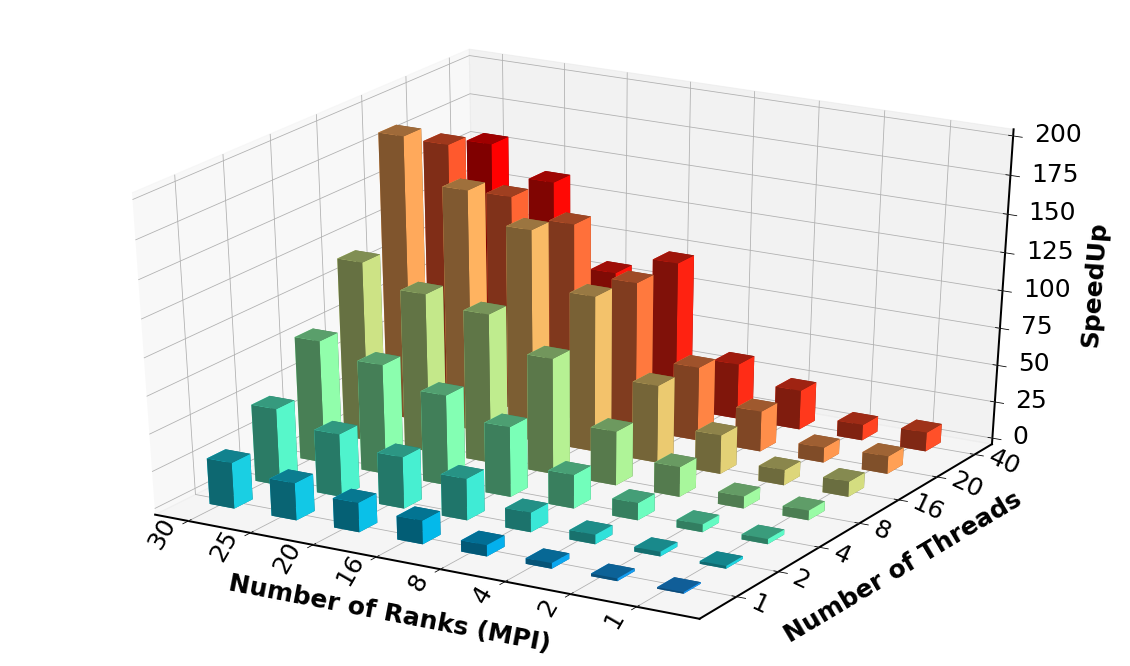

In [11]:
## log scale
fig = plt.figure(figsize=(20, 12))
# fig = plt.figure(figsize=(20, 15))
ax = fig.gca(projection='3d')
colors = cm.rainbow([0.2 + (1-0.2)/(len(ranks)-1)*i for i in range(len(ranks))])

width=1/2.5
ax.bar3d(np.log2(ranks_mod) - width,
         np.log2(threads_mod) - width,
         [0] * len(speed_up),
         width, width, speed_up, colors)

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set_xticks(np.log2(num_ranks_mod))
ax.set_xticklabels(num_ranks, rotation = (60), fontsize = 25, va='center', ha='right')
ax.set_xlabel('Number of Ranks (MPI)', fontsize=25, weight='bold', labelpad=24)
ax.set_xbound()
# ax.set_xticklabels()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.7))

ax.set_yticks(np.log2(num_threads_mod))
ax.set_yticklabels(num_threads, rotation = (335), fontsize = 25, verticalalignment='center', 
                   horizontalalignment='left')
# ax.set_yticklabels([str(i) for i in num_threads], rotation = (315), fontsize = 25, verticalalignment='center', 
#                    horizontalalignment='left')
ax.set_ylabel('Number of Threads', fontsize=25, weight='bold', labelpad=18)
ax.tick_params(axis='y', pad=0.4)
ax.yaxis.labelpad=23
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.9))

speedup=[0, 25, 50, 75, 100, 125, 150, 175, 200]
ax.set_zticklabels(speedup,  fontsize = 25, verticalalignment='center', 
                   horizontalalignment='left')
ax.set_zlabel('SpeedUp', fontsize=25, weight='bold', labelpad=18)
ax.set_zlim(0, 200)
ax.zaxis.labelpad=30

plt.show()

In [12]:
fname = "speedup_mpi+openmp_lumped_17810_p2"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [13]:
xx, yy = np.meshgrid(num_ranks, num_threads)
x, y = xx.ravel(), yy.ravel()

ranks, threads, speed_up = [], [], []

for i, j in zip(x, y):
    z = df[(df['Number_Ranks'] == i) & (df['Number_Threads'] == j)]['P4_SpeedUp'].values
    if z:
        speed_up.append(z[0])
        ranks.append(i)
        threads.append(j)

In [14]:
threads_mod = threads.copy()
for i in range(len(threads)):
    if threads_mod[i] == 20:
        threads_mod[i] = 32
    if threads_mod[i] == 40:
        threads_mod[i] = 64
        
ranks_mod = ranks.copy()
for i in range(len(ranks)):
    if ranks_mod[i] == 20:
        ranks_mod[i] = 32
    if ranks_mod[i] == 25:
        ranks_mod[i] = 64
    if ranks_mod[i] == 30:
        ranks_mod[i] = 128
        
num_threads_mod = num_threads.copy()
num_threads_mod[5] = 32
num_threads_mod[6] = 64

num_ranks_mod = num_ranks.copy()
num_ranks_mod[5] = 32
num_ranks_mod[6] = 64
num_ranks_mod[7] = 128

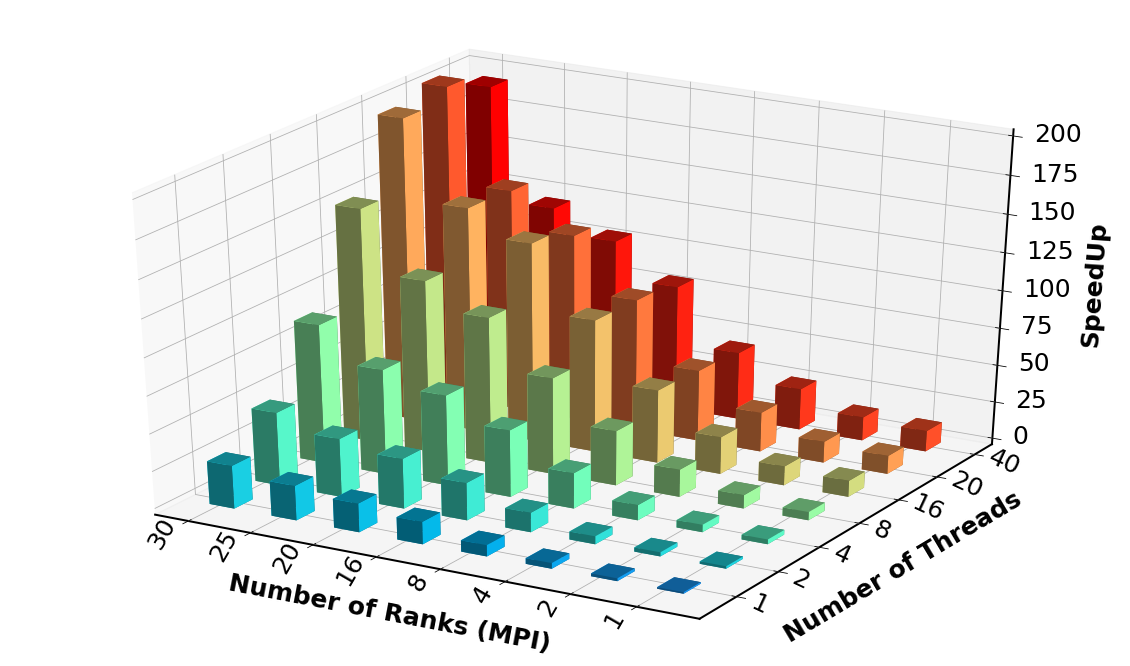

In [15]:
# log scale
fig = plt.figure(figsize=(20, 12))
# fig = plt.figure(figsize=(20, 15))
ax = fig.gca(projection='3d')
colors = cm.rainbow([0.2 + (1-0.2)/(len(ranks)-1)*i for i in range(len(ranks))])

width=1/2.5
ax.bar3d(np.log2(ranks_mod) - width,
         np.log2(threads_mod) - width,
         [0] * len(speed_up),
         width, width, speed_up, colors)

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set_xticks(np.log2(num_ranks_mod))
ax.set_xticklabels(num_ranks, rotation = (60), fontsize = 25, va='center', ha='right')
ax.set_xlabel('Number of Ranks (MPI)', fontsize=25, weight='bold', labelpad=24)
ax.set_xbound()

ax.set_yticks(np.log2(num_threads_mod))
ax.set_yticklabels(num_threads, rotation = (335), fontsize = 25, verticalalignment='center', 
                   horizontalalignment='left')
ax.set_ylabel('Number of Threads', fontsize=25, weight='bold', labelpad=18)
ax.tick_params(axis='y', pad=0.4)
ax.yaxis.labelpad=23

speedup=[0, 25, 50, 75, 100, 125, 150, 175, 200]
ax.set_zticklabels(speedup,  fontsize = 25, verticalalignment='center', 
                   horizontalalignment='left')
ax.set_zlabel('SpeedUp', fontsize=25, weight='bold', labelpad=18)
ax.set_zlim(0, 200)
ax.zaxis.labelpad=30

plt.show()

In [16]:
fname = "speedup_mpi+openmp_lumped_17810_p4"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

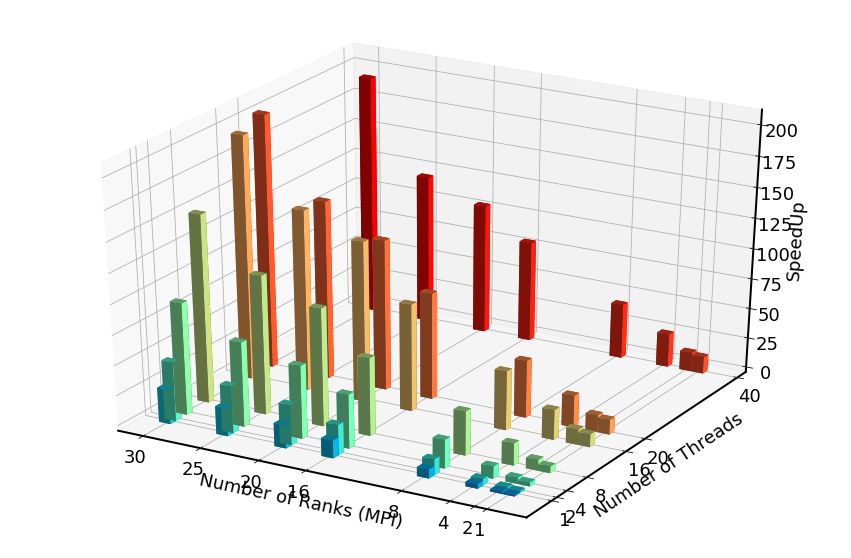

In [18]:
# linear scale

fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
colors = cm.rainbow([0.2 + (1-0.2)/(len(ranks)-1)*i for i in range(len(ranks))])

width = 1
ax.bar3d(np.array(ranks) - width,
         np.array(threads) - 2*width,
         [0] * len(speed_up),
         width, width, speed_up, colors)

ax.invert_xaxis()
ax.set_xticks(num_ranks)
ax.set_xlabel('Number of Ranks (MPI)')

ax.set_yticks(num_threads)
ax.set_ylabel('Number of Threads')

ax.set_zlabel('SpeedUp')

plt.show()